In [1]:
import qiskit

In [2]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.15.1',
 'qiskit-aer': '0.6.1',
 'qiskit-ignis': '0.4.0',
 'qiskit-ibmq-provider': '0.8.0',
 'qiskit-aqua': '0.7.5',
 'qiskit': '0.20.0'}

In [9]:
from qiskit import IBMQ
IBMQ.save_account('99dd2732137b2c7bfa4454608276608f5d67cd0ab870ae291beaee8a49102b5774ecc8a84b76a174013acc17f7535125cc047b984f88054cc38eb81a71478797')

configrc.store_credentials:WARNING:2020-09-07 10:19:01,995: Credentials already present. Set overwrite=True to overwrite.


In [8]:
overwrite=True

In [10]:
IBMQ.load_account()

C:\ProgramData\Anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [22]:
from qiskit import *

In [23]:
qr=QuantumRegister(2)

In [24]:
cr=ClassicalRegister(2)

In [25]:
circuit=QuantumCircuit(qr, cr)

In [31]:
%matplotlib inline

In [27]:
circuit.draw()

q3_0: 
      
q3_1: 
      
c1: 2/

In [29]:
circuit.h(qr[0])

In [35]:
circuit.draw()

┌───┐
q3_0: ┤ H ├
      └───┘
q3_1: ─────
           
c1: 2/═════

In [36]:
circuit.cx(qr[0],qr[1])

In [37]:
circuit.draw()

┌───┐     
q3_0: ┤ H ├──■──
      └───┘┌─┴─┐
q3_1: ─────┤ X ├
           └───┘
c1: 2/══════════

In [38]:
circuit.measure(qr,cr)

In [39]:
circuit.draw()

┌───┐     ┌─┐   
q3_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q3_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c1: 2/═══════════╩══╩═
                 0  1

In [40]:
simulator = Aer.get_backend('qasm_simulator')

In [42]:
result = execute(circuit, backend = simulator).result()

In [43]:
from qiskit.tools.visualization import plot_histogram

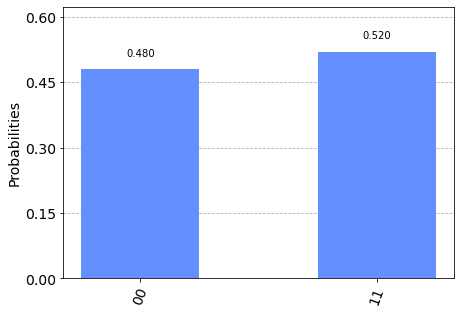

In [44]:
plot_histogram(result.get_counts(circuit))

In [45]:
IBMQ.load_account()

C:\ProgramData\Anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [46]:
provider=IBMQ.get_provider('ibm-q')

In [47]:
qcomp=provider.get_backend('ibmq_16_melbourne')

In [48]:
job=execute(circuit, backend=qcomp)

In [49]:
from qiskit.tools.monitor import job_monitor 

In [50]:
job_monitor(job)

Job Status: job has successfully run


In [53]:
result=job.result()

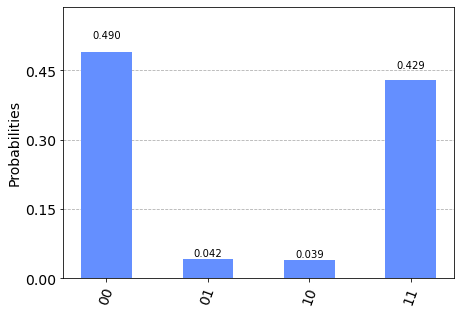

In [54]:
plot_histogram(result.get_counts(circuit))

In [76]:
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector

In [78]:
circuit=QuantumCircuit(1, 1)
circuit.x(0)
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend = simulator).result()
statevector = result.get_statevector()
print(statevector)
circuit.draw()

[0.+0.j 1.+0.j]


┌───┐
q_0: ┤ X ├
     └───┘
c: 1/═════

In [77]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(statevector)

TypeError: '>' not supported between instances of 'int' and 'NoneType'